In [18]:
# import matplotlib and numpy
import numpy as np
import matplotlib.pyplot as plt

In [9]:
from tensorflow.keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


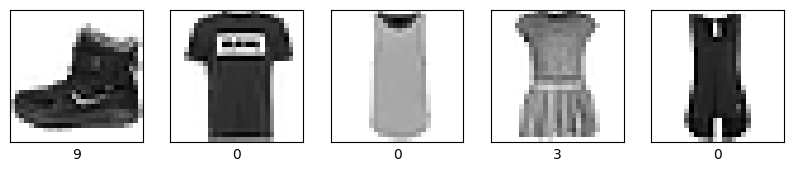

In [20]:
# Display a few example images from the dataset
def display_images(images, labels):
    plt.figure(figsize=(10,10))
    for i in range(5):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(str(labels[i]))
    plt.show()

display_images(train_images, train_labels)

In [12]:
# Write a function to sample subsets of different sizes from the training split
def sample_training_data(images, labels, fraction):
    sample_size = int(len(images) * fraction)
    indices = np.random.choice(range(len(images)), sample_size, replace=False)
    return images[indices], labels[indices]

In [13]:
# Evaluate classification performance on different training set sizes
training_fractions = np.linspace(0.001, 0.1, 10)
accuracies = []

In [19]:
# import PCA and KNN
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [15]:
for fraction in training_fractions:
    # Sample data
    sampled_images, sampled_labels = sample_training_data(train_images, train_labels, fraction)

    # Preprocessing: Flatten the images and apply PCA
    n_components = 50  # number of components for PCA
    sampled_images_flat = sampled_images.reshape(sampled_images.shape[0], -1)
    pca = PCA(n_components=n_components)
    pca.fit(sampled_images_flat)
    X_train_pca = pca.transform(sampled_images_flat)

    # Fit kNN classifier
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train_pca, sampled_labels)

    # Transform test set with the same PCA
    test_images_flat = test_images.reshape(test_images.shape[0], -1)
    X_test_pca = pca.transform(test_images_flat)

    # Predict and score the classifier
    predicted_labels = knn.predict(X_test_pca)
    accuracy = accuracy_score(test_labels, predicted_labels)
    accuracies.append(accuracy)
    print(f"Training fraction: {fraction:.4f}, Accuracy: {accuracy:.4f}")

Training fraction: 0.0010, Accuracy: 0.4671
Training fraction: 0.0120, Accuracy: 0.7566
Training fraction: 0.0230, Accuracy: 0.7623
Training fraction: 0.0340, Accuracy: 0.7888
Training fraction: 0.0450, Accuracy: 0.7894
Training fraction: 0.0560, Accuracy: 0.7969
Training fraction: 0.0670, Accuracy: 0.8016
Training fraction: 0.0780, Accuracy: 0.8038
Training fraction: 0.0890, Accuracy: 0.8072
Training fraction: 0.1000, Accuracy: 0.8084


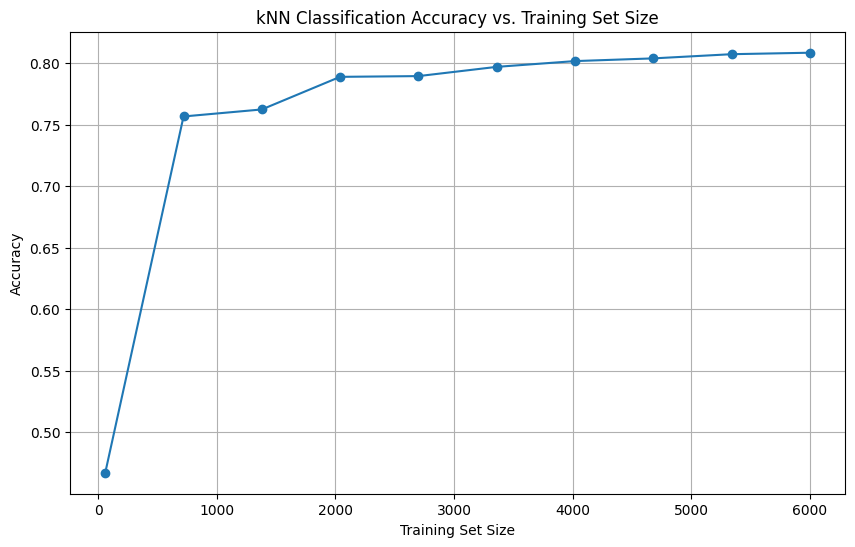

In [16]:
# Plot the test accuracy against the training set size
plt.figure(figsize=(10, 6))
plt.plot(training_fractions * len(train_images), accuracies, marker='o')
plt.title('kNN Classification Accuracy vs. Training Set Size')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [17]:
# Print the final accuracy predicted
final_accuracy = accuracies[-1]
print("Final Accuracy:", final_accuracy)

Final Accuracy: 0.8084
